<a href="https://colab.research.google.com/github/data602sps/datasetspractice/blob/main/07_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7**

# **Weeks 8 & 9 - Pandas**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.

* You must use Pandas as the **primary tool** to process your data.

* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  
 * https://www.youtube.com/watch?v=inN8seMm7UI (Getting started with Colab).

* Your data should need some "work", or be considered "dirty".  You must show your skills in data cleaning/wrangling.

### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

# 2022–2023 European Football Player Stats

## Dataset description

I chose a soccer analytics dataset from Kaggle:

- **Title:** 2022–2023 Football Player Stats  
- **Source:** Kaggle – Vivovinco  
- **Link:** https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats   

This dataset contains per-90-minute statistics for players from the **top five European leagues** in the 2022–2023 season (Premier League, La Liga, Serie A, Bundesliga, Ligue 1). It includes features such as:

- Player and team: name, position, squad, age, nationality  
- Playing time: matches played, minutes, starts  
- Productivity: goals (Gls), assists (Ast), non-penalty goals (G-PK)  

### Why I chose this dataset

I’m interested in soccer and soccer analytics and how data can be used to evaluate player performance and style of play. This dataset is a good fit because:

- It is many relevant numeric features, which is ideal for Pandas analysis.
- It covers multiple leagues and positions, allowing meaningful group comparisons.
- It includes advanced stats, which are commonly used in modern football analytics.
- It connects directly to real-world questions like:
  - Which players contribute the most in terms of goals + assists per 90?
  - Which teams rely on high-volume shooters vs efficient finishers?
  - Which players over- or under-perform their expected goals?
  
In this notebook, I will:
1. Import and explore the dataset (summary statistics, missing values, basic insights).  
2. Clean and wrangle the data (rename columns, fix types, create new metrics).  
3. Use Pandas to answer a few performance-related questions.  
4. Summarize my findings and propose next steps.


______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "2022-2023-Football-Player-Stats.csv"

df = pd.read_csv(data_path, encoding="latin1", sep=";")
df.shape

df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


## Info and Summary Statistics

In [2]:
# Basic info like column names, dtypes, non-null counts
df.info()

# Summary statistics for numeric columns
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 124 entries, Rk to AerWon%
dtypes: float64(112), int64(7), object(5)
memory usage: 2.5+ MB


,count,mean,std,min,25%,50%,75%,max
Rk,2689.0,1345.000000,776.391761,1.0,673.00,1345.00,2017.00,2689.0
Age,2689.0,26.011157,4.446259,15.0,23.00,26.00,29.00,41.0
Born,2689.0,1996.155820,4.450108,1981.0,1993.00,1996.00,2000.00,2007.0
MP,2689.0,11.833023,6.864278,1.0,5.00,13.00,18.00,23.0
Starts,2689.0,8.476013,6.994383,0.0,2.00,7.00,14.00,23.0
...,...,...,...,...,...,...,...,...
OG,2689.0,0.003142,0.022607,0.0,0.00,0.00,0.00,0.5
Recov,2689.0,4.951967,2.901833,0.0,3.33,5.00,6.27,30.0
AerWon,2689.0,1.312064,1.579539,0.0,0.33,0.93,1.79,25.0
AerLost,2689.0,1.497356,1.830391,0.0,0.55,1.10,1.83,30.0


In [3]:
# Missing values
df.isna().sum().sort_values(ascending=False)

,0
Nation,1
Rk,0
Player,0
Pos,0
Squad,0
...,...
OG,0
Recov,0
AerWon,0
AerLost,0


We can see that there is one column with a missing value: **Nation**. This will be addressed later.

Quick look at key columns

In [13]:
# Unique temas
df["Squad"].value_counts()


,count
Squad,
Hellas Verona,34
Cádiz,34
Schalke 04,34
Ajaccio,33
Spezia,33
...,...
Osasuna,23
Freiburg,23
Real Madrid,22


### Teams and positions

- The dataset includes players from 98 different teams, with roster sizes from 21 up to 34 players.

# Data Wrangling
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables.

8. Filter your data based on some condition.

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group.
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups.

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

Rename a few columns to more intuitive names

In [20]:
# Make a copy to avoid overwriting original
df_clean = df.copy()

# Rename some key columns to clearer names
df_clean = df_clean.rename(columns={
    "Player": "player",
    "Squad": "team",
    "Pos": "position",
    "Goals": "goals",
    "Assists": "assists",
    "SoT": "shots_on_target",
    "G/Sh": "goals_per_shot",
    "Min": "minutes"
})

df_clean.columns

Index(['Rk', 'player', 'Nation', 'position', 'team', 'Comp', 'Age', 'Born',
       'MP', 'Starts',
       ...
       'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon',
       'AerLost', 'AerWon%'],
      dtype='object', length=124)

Fix Data Types

In [21]:
# Convert 'minutes' to numeric
df_clean["minutes"] = (
    df_clean["minutes"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# Confirm the dtype
df_clean["minutes"].dtype

dtype('float64')

Create new metrics (goals per 90, assists per 90, contributions per 90, xG diff)

In [23]:
# Avoid division by zero with np.where
minutes_per_90 = df_clean["minutes"] / 90.0

df_clean["goals_per90"] = np.where(minutes_per_90 > 0,
                                   df_clean["goals"] / minutes_per_90,
                                   0)

df_clean["assists_per90"] = np.where(minutes_per_90 > 0,
                                     df_clean["assists"] / minutes_per_90,
                                     0)

df_clean["g+a_per90"] = df_clean["goals_per90"] + df_clean["assists_per90"]

### New features

I created several per-90 metrics and a performance differential:

- `goals_per90`: goals per 90 minutes  
- `assists_per90`: assists per 90 minutes  
- `g+a_per90`: combined goal + assist contribution per 90

Handle missing values in a targeted way

In [25]:
# For this analysis, I will:
# - fill missing goals and assists with 0 (players with no goals data treated as 0)
# - drop rows with missing minutes (since we use minutes for per-90 metrics)

df_clean["goals"] = df_clean["goals"].fillna(0)
df_clean["assists"] = df_clean["assists"].fillna(0)
df_clean["Nation"] = df_clean["Nation"].fillna(0)

df_clean = df_clean.dropna(subset=["minutes"])

df_clean.isna().sum().sort_values(ascending=False).head()

,0
Rk,0
player,0
Nation,0
position,0
team,0


Filter out goalkeepers for attacking analysis

In [26]:
# Focus on field players (non-GK) for attacking contribution
df_outfield = df_clean[df_clean["position"] != "GK"].copy()

df_outfield["position"].value_counts()

,count
position,
DF,825
MF,608
FW,409
FWMF,244
MFFW,208
DFMF,101
MFDF,62
DFFW,38
FWDF,30


# Analysis

## Top 10 players by goals per 90 (minimum minutes filter)

In [27]:
# Consider only players with at least 900 minutes (~10 full matches)
min_minutes = 900

top_scorers_per90 = (
    df_outfield[df_outfield["minutes"] >= min_minutes]
    .sort_values("goals_per90", ascending=False)
    [["player", "team", "position", "minutes", "goals", "goals_per90"]]
    .head(10)
)

top_scorers_per90

,player,team,position,minutes,goals,goals_per90
1057,Erling Haaland,Manchester City,FW,1636.0,25,1.375306
252,Wissam Ben Yedder,Monaco,FW,1135.0,14,1.110132
1858,Victor Osimhen,Napoli,FW,1401.0,16,1.027837
1426,Robert Lewandowski,Barcelona,FW,1334.0,14,0.944528
1797,Christopher Nkunku,RB Leipzig,FWMF,1282.0,12,0.842434
1455,Ademola Lookman,Atalanta,FWMF,1299.0,12,0.831409
1609,Kylian Mbappé,Paris S-G,FW,1468.0,13,0.797003
184,Folarin Balogun,Reims,FW,1591.0,14,0.791955
1687,Terem Moffi,Lorient,FW,1386.0,12,0.779221
260,Karim Benzema,Real Madrid,FW,1046.0,9,0.774379


## Top 10 players by goal contributions per 90

In [28]:
top_g_a_per90 = (
    df_outfield[df_outfield["minutes"] >= min_minutes]
    .sort_values("g+a_per90", ascending=False)
    [["player", "team", "position", "minutes", "goals", "assists", "g+a_per90"]]
    .head(10)
)

top_g_a_per90

,player,team,position,minutes,goals,assists,g+a_per90
1057,Erling Haaland,Manchester City,FW,1636.0,25,0.16,1.384108
252,Wissam Ben Yedder,Monaco,FW,1135.0,14,0.24,1.129163
1858,Victor Osimhen,Napoli,FW,1401.0,16,0.19,1.040043
1426,Robert Lewandowski,Barcelona,FW,1334.0,14,0.27,0.962744
1455,Ademola Lookman,Atalanta,FWMF,1299.0,12,0.28,0.850808
1797,Christopher Nkunku,RB Leipzig,FWMF,1282.0,12,0.00,0.842434
1609,Kylian Mbappé,Paris S-G,FW,1468.0,13,0.12,0.804360
260,Karim Benzema,Real Madrid,FW,1046.0,9,0.26,0.796750
184,Folarin Balogun,Reims,FW,1591.0,14,0.06,0.795349
1012,Vincenzo Grifo,Freiburg,FWMF,1289.0,11,0.21,0.782700


## Teams with highest total goals

In [29]:
team_summary = (
    df_outfield
    .groupby("team")
    .agg(
        total_goals=("goals", "sum"),
        total_minutes=("minutes", "sum"),
        players=("player", "nunique")
    )
    .sort_values("total_goals", ascending=False)
)

team_summary.head(10)


,total_goals,total_minutes,players
team,,,
Bayern Munich,58,17962.0,24
Paris S-G,54,20589.0,24
Manchester City,52,18835.0,20
Napoli,51,18900.0,23
Monaco,50,20484.0,24
Arsenal,44,18900.0,24
Barcelona,42,17925.0,24
Atalanta,40,19737.0,22
Eint Frankfurt,40,17077.0,24


## Visual with Pandas

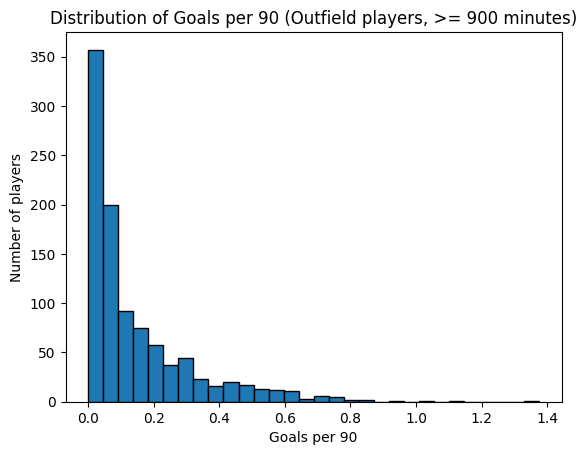

In [30]:
# Histogram of goals per 90 for outfield players with at least 900 minutes
(df_outfield[df_outfield["minutes"] >= min_minutes]["goals_per90"]
 .plot(kind="hist", bins=30, edgecolor="black"))

plt.title("Distribution of Goals per 90 (Outfield players, >= 900 minutes)")
plt.xlabel("Goals per 90")
plt.ylabel("Number of players")
plt.show()

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  What would you explore further with more time?

## Conclusions and Ideas for Further Exploration

### Summary of key findings

From this analysis of the **2022–2023 European Football Player Stats** dataset, I found:

1. **Top attacking contributors**  
   - When I ranked players by `goals_per90` and `g+a_per90` (with a minimum of 900 minutes), I identified a small group of forwards and attacking midfielders who contribute heavily relative to their playing time.
   - These players often come from high-scoring teams.

2. **Team-level scoring patterns**  
   - Aggregating by `team` showed which clubs produced the most total goals across the season.

3. **Impact of minutes played**  
   - Filtering on a minimum number of minutes (e.g., 900) prevents small samples (like substitutes or injured players) from dominating per-90 statistics.
   - This highlights the importance of considering **playing time** when ranking players.

### Ideas for further exploration

If I had more time, I would extend this analysis by:

- **Position-specific analysis:**  
  Comparing forwards, midfielders, and defenders separately to see what “good performance” looks like for each role.

- **Age and development curves:**  
  Investigating how age relates to per-90 output (goals, assists, xG) to see when players usually peak.

- **Season-to-season stability:**  
  Combining this dataset with other seasons (e.g., 2022-2023) to see which metrics are more stable over time (goals vs xG vs shots).

- **Predictive modeling:**  
  Building a simple regression model to predict future goal output based on current xG, shooting volume, minutes, and team strength.

Overall, this assignment showed how Pandas can be used effectively to clean real-world soccer data, create meaningful performance metrics, and explore questions that are directly relevant to modern football analytics.